# MMAI 5040 Final Project

In [1]:
# Importing necessary libraries
import numpy as np  
import pandas as pd  
import seaborn as sns 
import matplotlib.pyplot as plt  
import statsmodels.formula.api as smf  
from sklearn.preprocessing import LabelEncoder 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from statsmodels.sandbox.regression.gmm import IV2SLS
import statsmodels.api as sm
import warnings  # For handling warnings
warnings.filterwarnings('ignore')  # Ignoring warnings

In [2]:
# Reading the dataset into a pandas DataFrame
df=pd.read_csv('shopping_trends.csv')

# Cleaning column names: removing spaces, parentheses and replacing them with underscores
df.columns = df.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [3]:
# Check for missing values in each column
missing_values = df.isna().any()
print(missing_values)

Customer_ID                 False
Age                         False
Gender                      False
Item_Purchased              False
Category                    False
Purchase_Amount_USD         False
Location                    False
Size                        False
Color                       False
Season                      False
Review_Rating               False
Subscription_Status         False
Payment_Method              False
Shipping_Type               False
Discount_Applied            False
Promo_Code_Used             False
Previous_Purchases          False
Preferred_Payment_Method    False
Frequency_of_Purchases      False
dtype: bool


----------------------------------------------------------------

# Descriptive Analysis

## Tabular and Graphical Analysis

In [4]:
# Displaying the first few rows of the DataFrame
df.head()

Customer_ID  Age Gender Item_Purchased  Category  Purchase_Amount_USD  \
0            1   55   Male         Blouse  Clothing                   53   
1            2   19   Male        Sweater  Clothing                   64   
2            3   50   Male          Jeans  Clothing                   73   
3            4   21   Male        Sandals  Footwear                   90   
4            5   45   Male         Blouse  Clothing                   49   

        Location Size      Color  Season  Review_Rating Subscription_Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

  Payment_Method  Shipping_Type Discount_Applied Promo_Code_Used  \
0    Credit Card        Express              Yes             Yes   
1  Bank Transfer        Express              Yes             Yes   
2           Cash  Free Shipping              Yes             Yes   
3         PayPal   Next Day Air              Yes             Yes   
4           Cash  Free Shipping              Yes             Yes   

   Previous_Purchases Preferred_Payment_Method Frequency_of_Purchases  
0                  14                    Venmo            Fortnightly  
1                   2                     Cash            Fortnightly  
2                  23              Credit Card                 Weekly  
3                  49                   PayPal                 Weekly  
4                  31                   PayPal               Annually

In [5]:
# Describing the statistical summary of specific columns
df[['Age', 'Purchase_Amount_USD', 'Review_Rating', 'Previous_Purchases']].describe()

Age  Purchase_Amount_USD  Review_Rating  Previous_Purchases
count  3900.000000          3900.000000    3900.000000         3900.000000
mean     44.068462            59.764359       3.749949           25.351538
std      15.207589            23.685392       0.716223           14.447125
min      18.000000            20.000000       2.500000            1.000000
25%      31.000000            39.000000       3.100000           13.000000
50%      44.000000            60.000000       3.700000           25.000000
75%      57.000000            81.000000       4.400000           38.000000
max      70.000000           100.000000       5.000000           50.000000

Age:
- The 'count' indicates there are 3,900 observations.
- The average age ('mean') of the individuals in the dataset is approximately 44.07 years.
- The 'std' (standard deviation) is about 15.21, indicating the average amount that the age varies from the mean.
- The minimum ('min') age is 18, and the maximum ('max') age is 70, showing a wide age range.
- The 25th percentile is 31, the median (50th percentile) is 44, and the 75th percentile is 57. This suggests that half of the individuals are between 31 and 57 years old.

Purchase_Amount_USD:
- The average purchase amount is approximately 59.76 dollars.
- The standard deviation of purchase amounts is about 23.69 dollars, indicating variability in how much customers spend.
- The smallest purchase amount is 20, and the largest is 100, indicating the range of spending in the dataset.
- The interquartile range, from the 25th to the 75th percentile, goes from 39 to 81.

Review_Rating:
- The average product review rating is about 3.75 out of 5, suggesting generally positive reviews.
- The standard deviation is approximately 0.72, which is relatively low, indicating that most ratings are close to the mean.
- Ratings range from a low of 2.5 to a perfect score of 5.
- The median rating is 3.7, very close to the mean, suggesting a symmetric distribution of ratings around the central value.

Previous_Purchases:
- On average, customers have made about 25.35 previous purchases.
- The standard deviation is 14.45, showing that the number of previous purchases varies quite a bit among customers.
- The minimum number of previous purchases is 1, indicating at least some customers are relatively new.
- The maximum number of previous purchases is 50, showing that there are also highly frequent customers.
- The median is 25, which means half of the customers have made 25 or fewer purchases, and the other half have made more than 25 purchases.

In [6]:
# Count the occurrences of each category in the 'Gender' variable
gender_counts = df['Gender'].value_counts().reset_index()

gender_counts

Gender  count
0    Male   2652
1  Female   1248

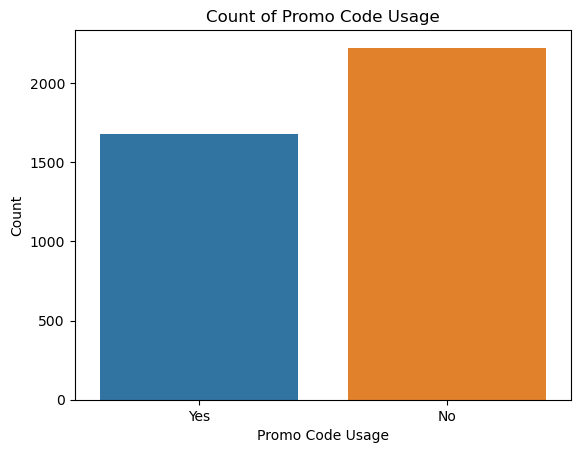

In [7]:
# Count of Promo Code Usage
sns.countplot(x='Promo_Code_Used', data=df)
plt.title('Count of Promo Code Usage')
plt.xlabel('Promo Code Usage')
plt.ylabel('Count');

This bar chart compares the counts of transactions where promo codes were used against those where they were not. The blue bar represents transactions with promo codes, and the orange bar represents transactions without. The chart suggests that promo codes were not used in the majority of transactions.

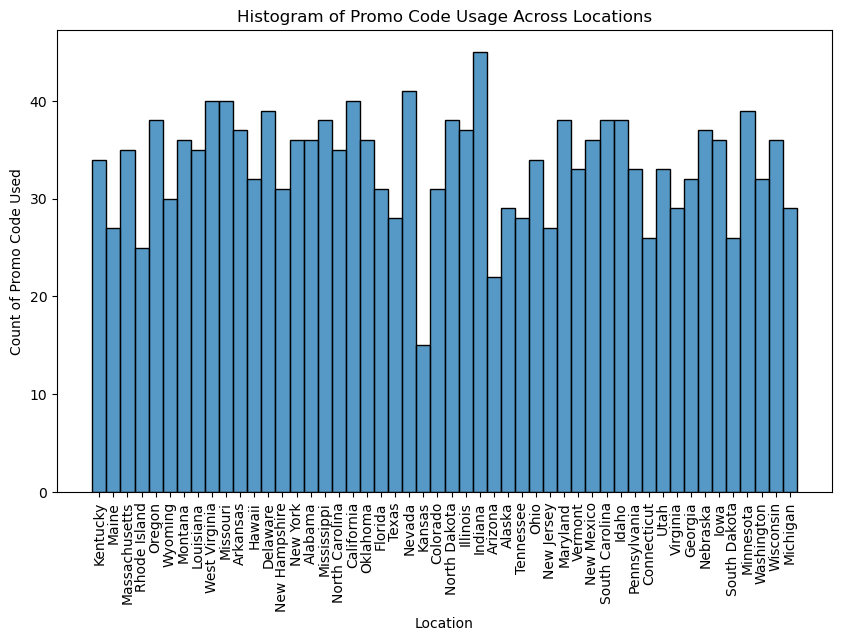

In [8]:
# Count of promo code uses in different locations

# Filter the DataFrame to include only the rows where a promo code was used
promo_used_df = df[df['Promo_Code_Used'] == 'Yes']

# Plotting the histogram
plt.figure(figsize=(10, 6))
sns.histplot(promo_used_df['Location'], bins=len(promo_used_df['Location'].unique()), kde=False)

plt.title('Histogram of Promo Code Usage Across Locations')
plt.xlabel('Location')
plt.ylabel('Count of Promo Code Used')
plt.xticks(rotation=90)
plt.show()


This histogram displays the distribution of promo code usage across various locations. Each bar represents a different location, and the height indicates the count of promo code usages in that location. The highest count of promo code used location is Indiana, and the lowest count of promo code used location is Kansas. 

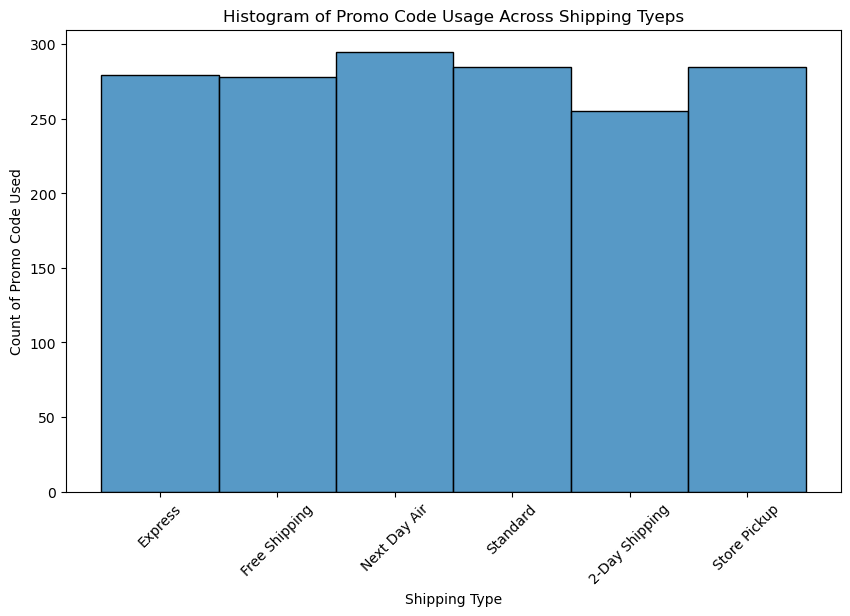

In [9]:
# Count of promo code uses in different shipping types

# Filter the DataFrame to include only the rows where a promo code was used
promo_used_df = df[df['Promo_Code_Used'] == 'Yes']

# Plotting the histogram
plt.figure(figsize=(10, 6))
sns.histplot(promo_used_df['Shipping_Type'], bins=len(promo_used_df['Shipping_Type'].unique()), kde=False)

plt.title('Histogram of Promo Code Usage Across Shipping Tyeps')
plt.xlabel('Shipping Type')
plt.ylabel('Count of Promo Code Used')
plt.xticks(rotation=45)
plt.show()

This histogram compares the frequency of promo code usage across different shipping types. The bars are almost equal in height, suggesting a relatively even distribution of promo code usage across different shipping types.

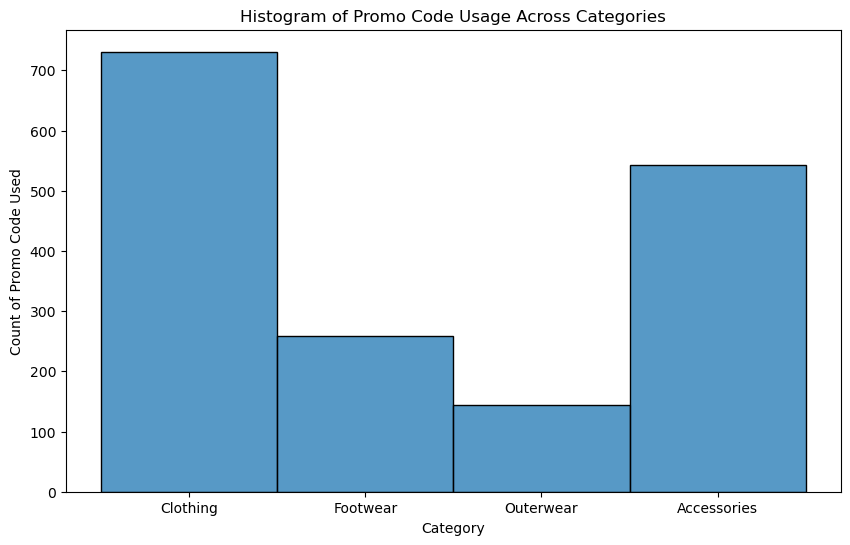

In [10]:
# Count of promo code uses in different categories

# Filter the DataFrame to include only the rows where a promo code was used
promo_used_df = df[df['Promo_Code_Used'] == 'Yes']

# Plotting the histogram
plt.figure(figsize=(10, 6))
sns.histplot(promo_used_df['Category'], bins=len(promo_used_df['Category'].unique()), kde=False)

plt.title('Histogram of Promo Code Usage Across Categories')
plt.xlabel('Category')
plt.ylabel('Count of Promo Code Used')
plt.show()


This bar chart indicates the count of promo code usages across different product categories. "Clothing" appears to have the highest count of promo code usage, while "Accessories" has the lowest among the categories shown.

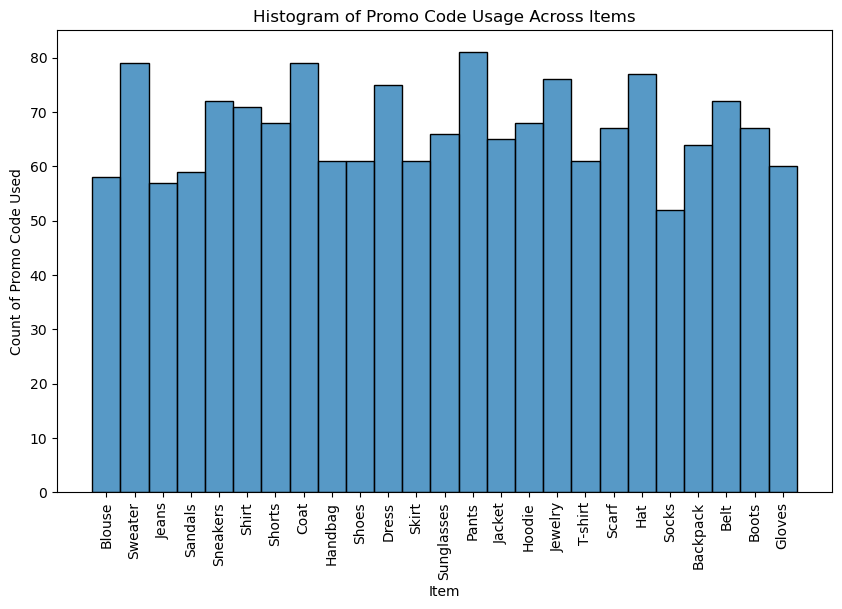

In [11]:
# Count of promo code uses in different items

# Filter the DataFrame to include only the rows where a promo code was used
promo_used_df = df[df['Promo_Code_Used'] == 'Yes']

# Plotting the histogram
plt.figure(figsize=(10, 6))
sns.histplot(promo_used_df['Item_Purchased'], bins=len(promo_used_df['Item_Purchased'].unique()), kde=False)

plt.title('Histogram of Promo Code Usage Across Items')
plt.xlabel('Item')
plt.ylabel('Count of Promo Code Used')
plt.xticks(rotation=90)
plt.show()


This histogram shows the count of promo code usage for different items. The highest count of promo code usage in purchase items is pants, and the lowest count of promo code usage in purchase items is socks. However, the chart suggests varied promo code usage across items, with no single item dominating.

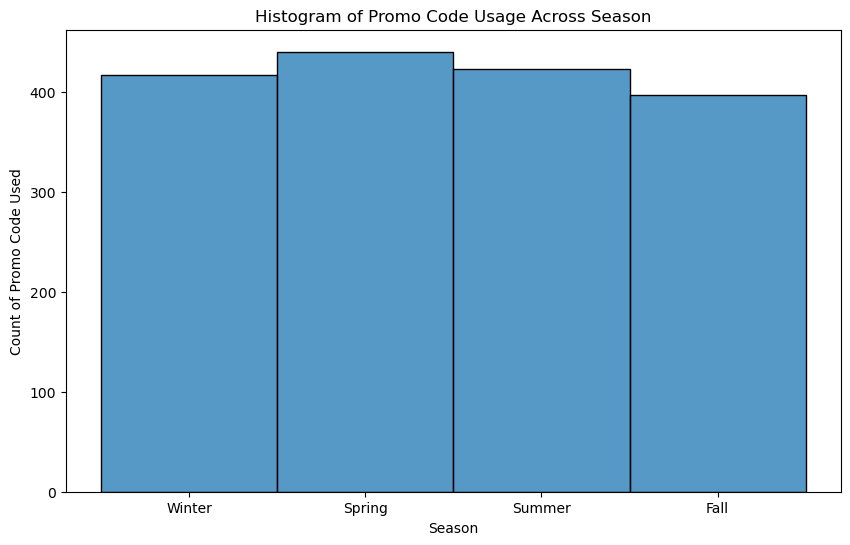

In [12]:
# Count of promo code uses in different seasons

# Filter the DataFrame to include only the rows where a promo code was used
promo_used_df = df[df['Promo_Code_Used'] == 'Yes']

# Plotting the histogram
plt.figure(figsize=(10, 6))
sns.histplot(promo_used_df['Season'], bins=len(promo_used_df['Season'].unique()), kde=False)

plt.title('Histogram of Promo Code Usage Across Season')
plt.xlabel('Season')
plt.ylabel('Count of Promo Code Used')
plt.show()


This histogram displays the count of promo code usages across different seasons of the year. The chart suggests a relatively balanced use of promo codes throughout the seasons, with a slight variation in counts.

In [13]:
columns_to_encode = ['Gender', 'Item_Purchased', 'Category', 'Location', 'Size', 'Color',
                     'Season', 'Subscription_Status', 'Payment_Method', 'Shipping_Type',
                     'Discount_Applied', 'Promo_Code_Used', 'Preferred_Payment_Method',
                     'Frequency_of_Purchases']

# One-hot encoding
df_encoded = pd.get_dummies(df, columns=columns_to_encode, drop_first=True)

# Compute correlation matrix
correlation_matrix = df_encoded.corr()

# Get correlation with the target variable 'Purchase Amount (USD)'
correlation_with_target = correlation_matrix["Purchase_Amount_USD"].sort_values(ascending=False)

print("Correlation with target:\n", correlation_with_target)

Correlation with target:
 Purchase_Amount_USD      1.000000
Color_Green              0.053380
Location_Alaska          0.045360
Location_Pennsylvania    0.039951
Location_Arizona         0.037324
                           ...   
Color_Indigo            -0.029355
Season_Summer           -0.032681
Category_Outerwear      -0.032938
Location_Connecticut    -0.033689
Color_Turquoise         -0.034440
Name: Purchase_Amount_USD, Length: 136, dtype: float64


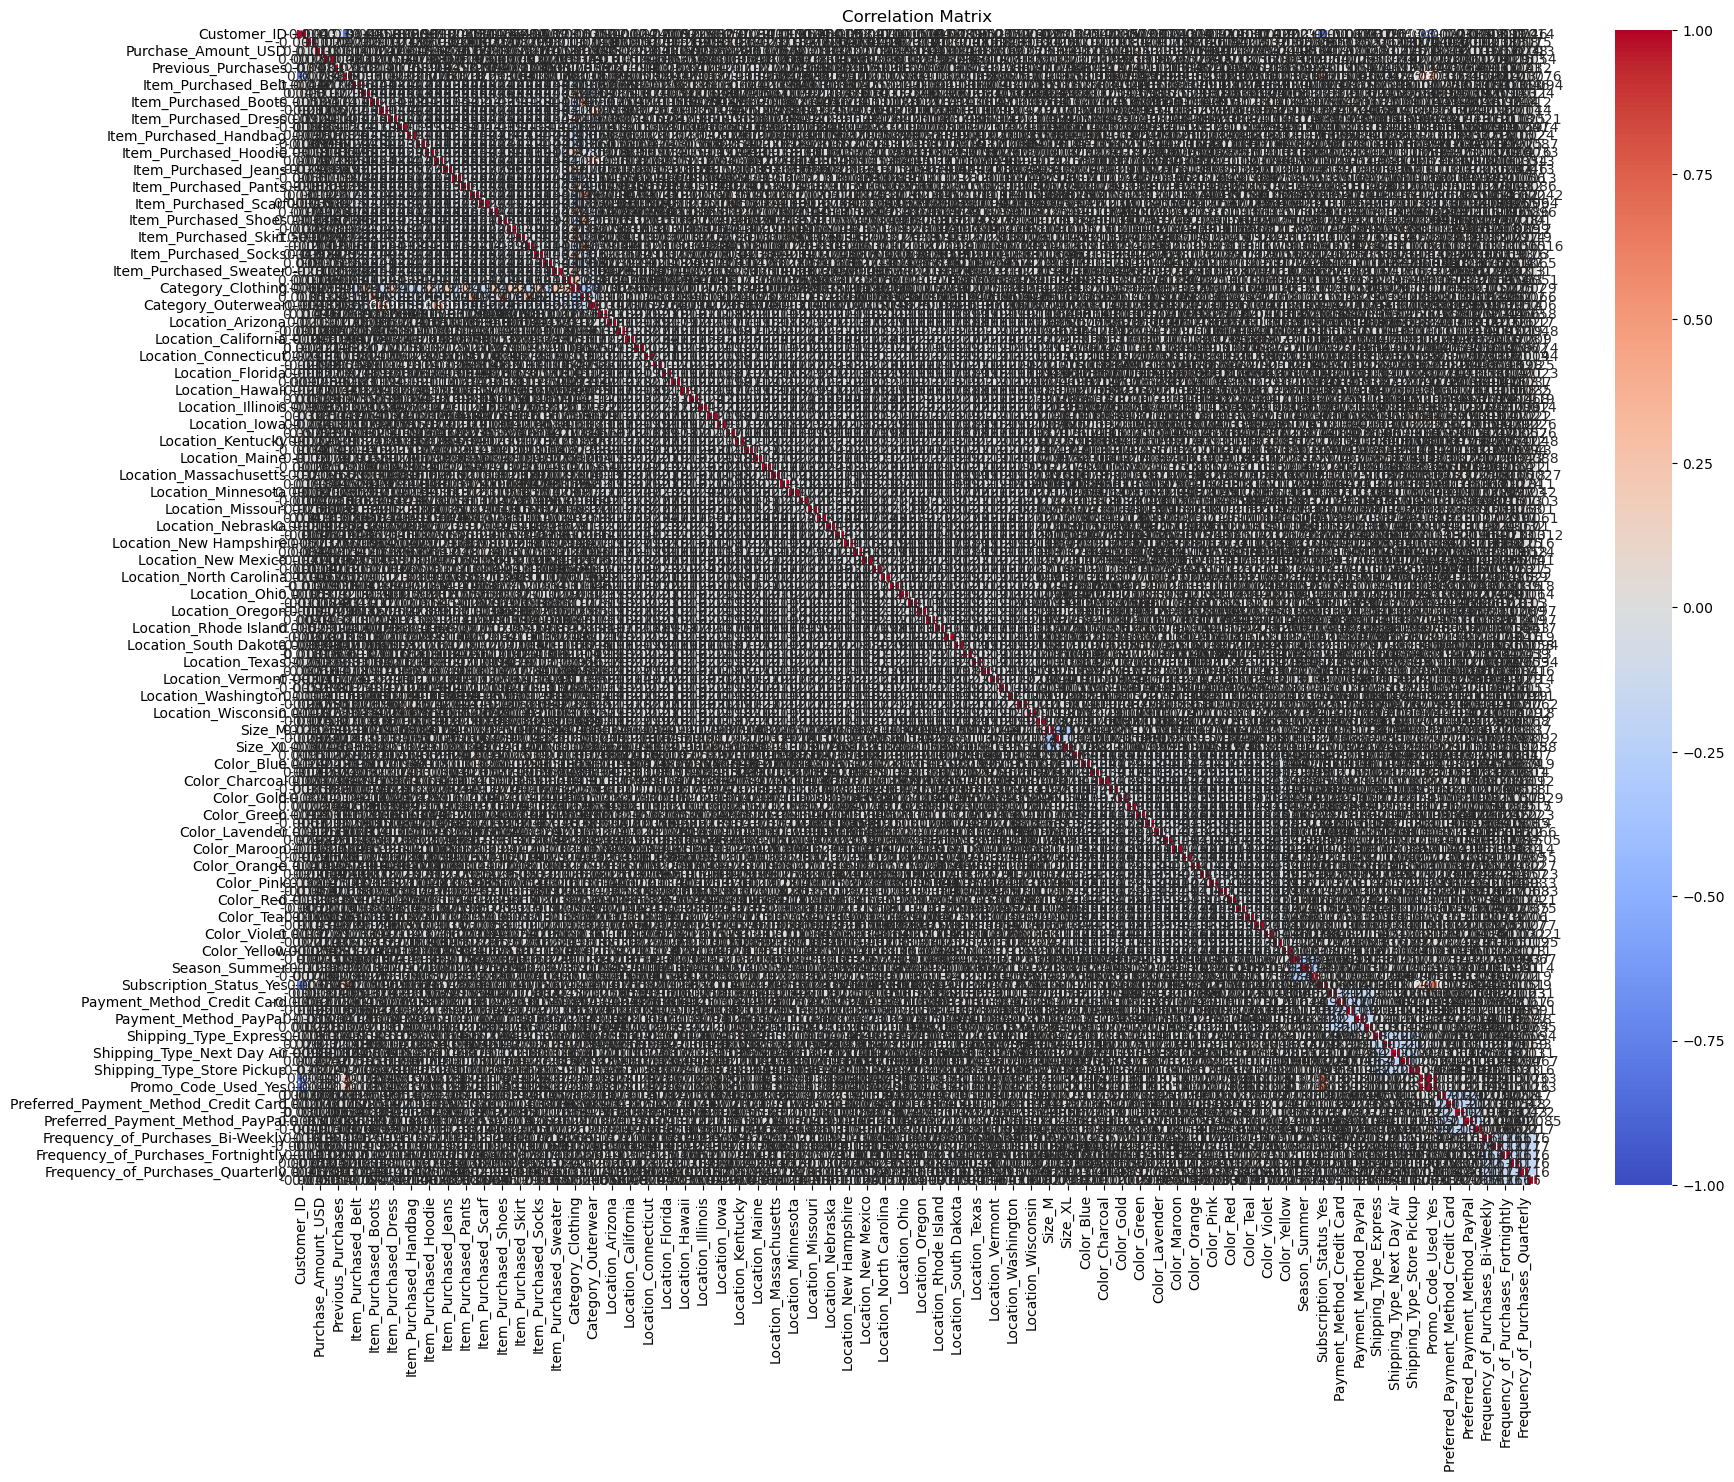

In [14]:
# Plot the correlation matrix using a heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

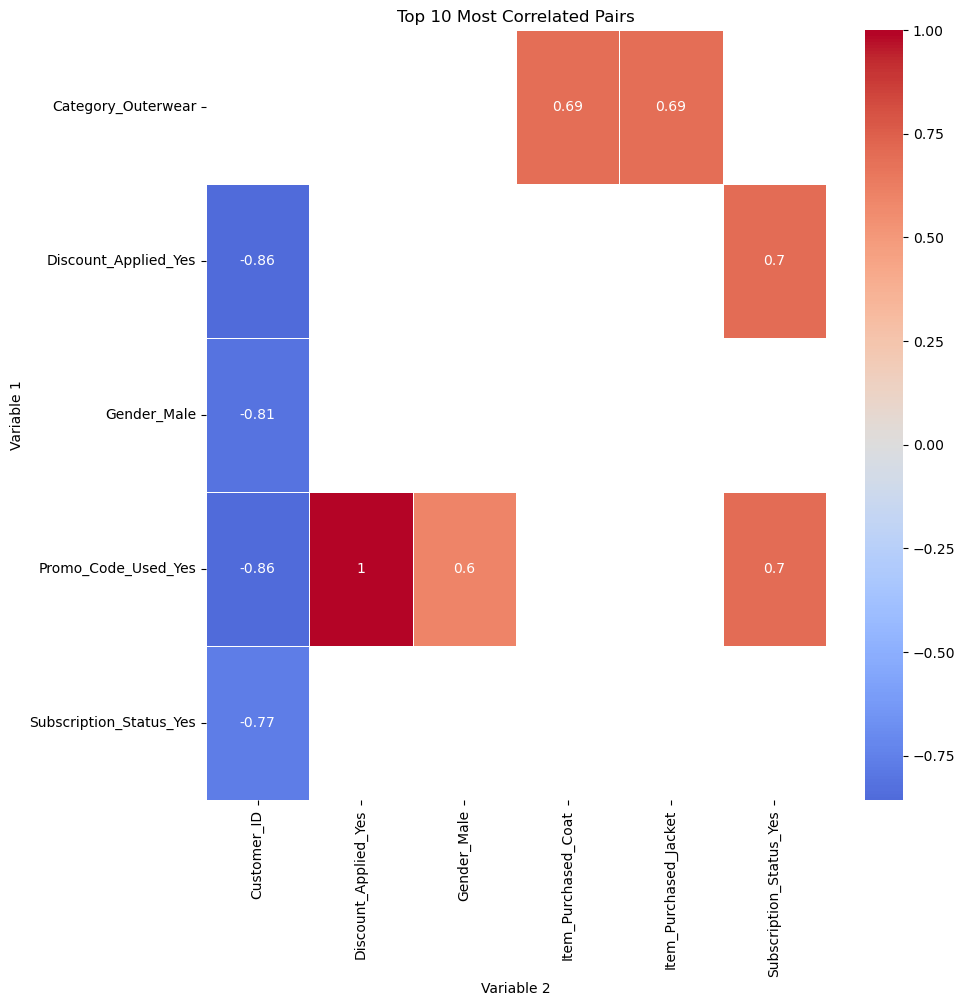

In [15]:
# Compute correlation matrix
correlation_matrix = df_encoded.corr()

# Remove diagonal and upper half of the matrix as it's redundant
correlation_matrix = correlation_matrix.where(np.tril(np.ones(correlation_matrix.shape), k=-1).astype(bool))

# Stack and reset index
correlations = correlation_matrix.stack().reset_index()
correlations.columns = ['Variable 1', 'Variable 2', 'Correlation']

# Sort by absolute correlation value
correlations['AbsCorrelation'] = correlations['Correlation'].abs()
sorted_correlations = correlations.sort_values(by='AbsCorrelation', ascending=False)

# Take top N most correlated pairs
N = 10
top_correlations = sorted_correlations.head(N)

# Plot the top correlations
plt.figure(figsize=(10, 10))
sns.heatmap(top_correlations.pivot_table(index='Variable 1', columns='Variable 2', values='Correlation'),
            annot=True, cmap='coolwarm', center=0, linewidths=.5)
plt.title("Top {} Most Correlated Pairs".format(N))
plt.show()


This heatmap shows the top correlated variable pairs. The color intensity represents the strength of the correlation, with red indicating a positive correlation and blue indicating a negative correlation. It seems that 'Discount_Applied_Yes' and 'Promo_Code_Used_Yes' are strongly negatively correlated, suggesting that when a discount is applied, a promo code is less likely to be used, or vice versa. 

# Segmentation and Control Analysis

In [16]:
# Load dataset
df = pd.read_csv('shopping_trends.csv')
df.columns = df.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

# Convert 'Promo_Code_Used' to numeric, making sure 'Yes' and 'No' are converted to 1 and 0 respectively
df['Promo_Code_Used'] = df['Promo_Code_Used'].map({'Yes': 1, 'No': 0})

# Ensure other columns are numeric as well, casting them to numeric types if necessary
df['Purchase_Amount_USD'] = pd.to_numeric(df['Purchase_Amount_USD'], errors='coerce')
df['Review_Rating'] = pd.to_numeric(df['Review_Rating'], errors='coerce')
df['Previous_Purchases'] = pd.to_numeric(df['Previous_Purchases'], errors='coerce')

# Perform label encoding on categorical columns
label_encoder = LabelEncoder()
df['Category'] = label_encoder.fit_transform(df['Category'])
df['Location'] = label_encoder.fit_transform(df['Location'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# Perform the aggregation
grouped = df.groupby(['Gender', 'Location'])
segment_analysis = grouped.agg({
    'Purchase_Amount_USD': 'mean',
    'Promo_Code_Used': 'mean',
    'Review_Rating': 'mean',
    'Previous_Purchases': 'mean'
}).reset_index()

In [17]:
# Display the results
segment_analysis

Gender  Location  Purchase_Amount_USD  Promo_Code_Used  Review_Rating  \
0        0         0            62.148148         0.000000       3.600000   
1        0         1            72.083333         0.000000       3.712500   
2        0         2            66.320000         0.000000       3.648000   
3        0         3            69.640000         0.000000       3.588000   
4        0         4            59.862069         0.000000       3.706897   
..     ...       ...                  ...              ...            ...   
95       1        45            60.849057         0.547170       3.630189   
96       1        46            65.187500         0.666667       3.872917   
97       1        47            67.844828         0.689655       3.608621   
98       1        48            57.220000         0.720000       3.900000   
99       1        49            63.490196         0.588235       3.643137   

    Previous_Purchases  
0            29.925926  
1            28.333333  
2            26.040000  
3            24.400000  
4            23.172414  
..                 ...  
95           22.603774  
96           24.958333  
97           22.879310  
98           22.780000  
99           29.019608  

[100 rows x 6 columns]

Customer Segmentation: Segment customers based on available characteristics such as age, gender, location, etc.

Control Variables: Select relevant control variables that may affect purchasing behavior. This could include review ratings, the number of previous purchases, or whether a promo code was used.

Aggregate Data: For each segment, calculate key metrics like the average purchase amount, the proportion of customers using promo codes, and the average review rating.

Analysis: Compare these metrics across different segments to identify patterns or significant differences in purchasing behavior.


1. Gender and Location: These columns represent the segments of the data. Each row corresponds to a unique combination of 'Gender' and 'Location'. The numbers are likely encoded from categorical variables, where each unique category is assigned a numerical label.

2. Purchase_Amount_USD:
   - This column shows the average purchase amount in USD for each segment.
   - The values vary across segments, indicating that the average spending differs by gender and location.
   - For example, the first row for Gender 0, Location 0 has an average purchase amount of approximately 62.14 USD.

3. Promo_Code_Used:
   - This represents the proportion of purchases where a promo code was used within each segment.
   - A value of 0 means no purchases in that segment used a promo code, while values closer to 1 indicate a higher usage rate.
   - Looking at the bottom rows, for Gender 1, Location 49, around 58.8% of purchases used a promo code.

4. Review_Rating:
   - This shows the average review rating for each segment. It suggests customer satisfaction or the quality of the product or service.
   - The review ratings seem to hover around the 3.5 to 4.0 range, suggesting generally positive reviews across segments.

5. Previous_Purchases:
   - This column indicates the average number of previous purchases for customers in each segment.
   - This could reflect customer loyalty or frequency of purchases.
   - For instance, Gender 0, Location 0 has, on average, roughly 29.93 previous purchases, which might indicate a group of loyal or frequent customers.

From this table, a business could derive insights such as:

- Which gender-location combinations are spending more or less, on average.
- Where promo codes are more likely to influence purchasing behavior.
- How customer satisfaction (as inferred from review ratings) might correlate with spending or promo code usage.
- If there's a relationship between the number of previous purchases (which might be used as a proxy for customer loyalty) and other factors like purchase amount and promo code usage.

This segmentation and control analysis helps to identify patterns in customer behavior that are specific to different demographic segments and can inform targeted marketing strategies, product development, customer service improvements, and other business decisions.

----------------------------------------------------------------

# Causality Analysis

## Propensity Score Matching

- Null Hypothesis (H0): The use of a promo code does not significantly affect the purchase amount in USD. 
- Alternative Hypothesis (H1): The use of a promo code significantly affects the purchase amount in USD. 

### Purchase amount vs. Promo code used or not

In [18]:
# Load dataset
df = pd.read_csv('shopping_trends.csv')
df.columns = df.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

# Preprocessing: Converting useful categorical variables to numeric
labelencoder = LabelEncoder()
df['Promo_Code_Used'] = df['Promo_Code_Used'].map({'Yes': 1, 'No': 0})
df['Category'] = labelencoder.fit_transform(df['Category'])

# Select covariates that will be used for matching
covariates = ['Age', 'Review_Rating', 'Previous_Purchases', 'Category']
X = df[covariates]
y = df['Promo_Code_Used']

# Standardize the covariates to have mean=0 and sd=1
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Fit logistic regression to compute propensity scores
logit = LogisticRegression()
logit.fit(X_std, y)

# Add the propensity scores to the dataframe
df['Propensity_Score'] = logit.predict_proba(X_std)[:, 1]

# Separate treatment and control groups
treatment_df = df[df['Promo_Code_Used'] == 1]
control_df = df[df['Promo_Code_Used'] == 0]

# Use Nearest Neighbors to perform 1:1 matching without replacement
nn = NearestNeighbors(n_neighbors=1, algorithm='ball_tree').fit(control_df[['Propensity_Score']])
distances, indices = nn.kneighbors(treatment_df[['Propensity_Score']])

# Create a matched control dataframe
matched_control_df = control_df.iloc[indices.flatten()]

# Combine matched treatment and control dataframes for further analysis
matched_df = pd.concat([treatment_df, matched_control_df])
matched_df.reset_index(drop=True, inplace=True)

The PSM analysis was conducted to match customers who used a promo code (treatment group) with those who did not (control group), based on similar propensity socres. Propensity scores were calculated using logistic regression on covariates like 'Age', 'Review_Rating', 'Previous_Purchases', and 'Category'. 

### Evaluate Balance

In [19]:
# Evaluate the balance by comparing standardized mean differences - No Gender
SMDs = {}

for covariate in covariates:
    treated_mean = treatment_df[covariate].mean()
    control_mean = matched_control_df[covariate].mean()
    pooled_std = np.sqrt(treatment_df[covariate].std()**2 + matched_control_df[covariate].std()**2)
    SMD = (treated_mean - control_mean) / pooled_std
    SMDs[covariate] = SMD
    
print('Standardized Mean Differences (SMDs):', SMDs)

Standardized Mean Differences (SMDs): {'Age': 0.0062093965620813735, 'Review_Rating': 0.01891176956064404, 'Previous_Purchases': 0.009384175251775343, 'Category': -0.001868217259851074}


The Standardized Mean Differences (SMDs) for the covariates were found to be small (all values close to zero), suggesting a good balance between the treatment and control groups after matching. This implies that the matching process was effective in creating comparable groups. 

### Compare Outcomes

In [20]:
# Compare outcomes by calculating the Average Treatment Effect on the Treated (ATT)
ATT = treatment_df['Purchase_Amount_USD'].mean() - matched_control_df['Purchase_Amount_USD'].mean()

print('Average Treatment Effect on the Treated (ATT):', ATT)


Average Treatment Effect on the Treated (ATT): -1.1490757304710755


The ATT of -1.1491 suggests that, on average, the use of a promo code is associated with a decrease in the purchase amount of about $1.15 among those who used the promo code. However, this effect is relatively small. 

### Regression Analysis to Estimate the Causal Effect

In [21]:
# Define the outcome variable and the treatment
Y = matched_df['Purchase_Amount_USD']
X = matched_df['Promo_Code_Used']

# Add a constant to the independent variables to include an intercept in the model
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(Y, X).fit()

# Print the summary of the regression model
print(model.summary())


                             OLS Regression Results                            
Dep. Variable:     Purchase_Amount_USD   R-squared:                       0.001
Model:                             OLS   Adj. R-squared:                  0.000
Method:                  Least Squares   F-statistic:                     1.940
Date:                 Thu, 30 Nov 2023   Prob (F-statistic):              0.164
Time:                         17:52:55   Log-Likelihood:                -15402.
No. Observations:                 3354   AIC:                         3.081e+04
Df Residuals:                     3352   BIC:                         3.082e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              60.4281      

- The OLS regression analysis aimed to estimate the impact of promo code usage on purchase amounts. The coefficient for 'Promo_Code_Used' is -1.1491, aligning with the ATT value, indicating a negative association between promo code usage and purchase amount. 
- However, the p-value for 'Promo_Code_Usage' is 0.164, which is greater than the typical alpha level of 0.05. This implies that the effect of promo code usage on purchase amount is not statistically significant at the 5% level. 
- The R-squared value of the model is 0.001, suggesting that the model explains only 0.1% of the variance in purchase amounts. This indicated a very weak explanatory power of the model. 

Based on the analysis, we fail to reject the null hypothesis. The use of promo codes does not have a statistically significant impact on the purchase amount in USD, according to the data and methods applied in this analysis. However, the business implications of promo codes may extend beyond just the immediate transaction value and warrant further investigation. 

#### Overall analysis and business implications
- This analysis suggests that while there is a slight decrease in purchase amount among those who use promo codes, this effect is not statistically significant and the overall impact on purchase amount is minimal. 
- From a business perspective, this could imply that promo codes may not sigificantly drive higher spending per transaction, but they might still be effective in other aspects like attracting customers or increasing the frequency pf purchases. 
- The findings should prompt a reevaluation of the promo code strategy, possibly focusing on how promo codes impact other aspects of customer behavior like loyalty or purchase frequency, rather than just transaction value. 

-----------------------------------------------------------------

## Instrumental Variable Analysis

- Null Hypothesis: The use of promo code has no effect on the purchase amount in USD.  
- Alternative Hypothesis: The use of promo code has an effect on the purchase amount in USD. 

In [22]:
# Check 'Location'

# Load the dataset
df = pd.read_csv('shopping_trends.csv')
df.columns = df.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

# Convert categorical variables to numeric
labelencoder = LabelEncoder()
df['Promo_Code_Used'] = df['Promo_Code_Used'].map({'Yes': 1, 'No': 0})
df['Location'] = labelencoder.fit_transform(df['Location'])

# First stage: regress the endogenous variable on the instrument
X = df['Location']  # The instrument
y = df['Promo_Code_Used']  # The endogenous variable

# Add a constant to the instruments
X = sm.add_constant(X)

# Perform the first stage regression
first_stage = sm.OLS(y, X).fit()

# Check the F-statistic for relevance
print('First stage F-statistic:', first_stage.fvalue)


First stage F-statistic: 0.5544691308581963


An F-statistic of 0.55 in the first-stage regression of an instrumental variable analysis is considerably below the common rule-of-thumb threshold of 10. This suggests that the instrument 'Location' is weakly correlated with the endogenous variable 'Promo_Code_Used'.

In [26]:
# Check 'Gender'

import pandas as pd
from statsmodels.sandbox.regression.gmm import IV2SLS

# Load the dataset
df = pd.read_csv('shopping_trends.csv')
df.columns = df.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

# Convert categorical variables to numeric
labelencoder = LabelEncoder()
df['Promo_Code_Used'] = df['Promo_Code_Used'].map({'Yes': 1, 'No': 0})
df['Category'] = labelencoder.fit_transform(df['Category'])
df['Location'] = labelencoder.fit_transform(df['Location'])
df['Gender'] = labelencoder.fit_transform(df['Gender'])

# First stage: regress the endogenous variable on the instrument
X = df[['Gender']]  # The instrument
y = df['Promo_Code_Used']  # The endogenous variable

# Add a constant to the instruments
X = sm.add_constant(X)

# Perform the first stage regression
first_stage = sm.OLS(y, X).fit()

# Check the F-statistic for relevance
print('First stage F-statistic:', first_stage.fvalue)


First stage F-statistic: 2145.4592


Relevance: According to the literature (https://blog.zoovu.com/women-vs-men-gender-differences-in-purchase-decision-making/), it suggests gender differences in shopping behavior and responsiveness to marketing and promotions. For instance, studies have found that women are more likely to engage with retail promotions such as discounts or promo codes compared to men. This could be due to a variety of reasons including socialization patterns tha influence shopping behavior, gender differences in the perceived value of saving money, or even differences in the types of products marketed towards different genders which might be more likely to carry promotions. Based on these insights, we can hypothesize that 'Gender' would be relevant as it systematically influences the probability od using a promo code. 

Statistical Tests: An F-statistic of 2145.4592 in the first-stage regression is significantly above the threshold of 10, indicating that 'Gender' is strongly correlated with the endogenous variable 'Promo_Code_Used'. This means that 'Gender' could potentially serve as a relavant instrumental variable for 'Promo_Code_Used'. 

In [27]:
import statsmodels.api as sm
from linearmodels.iv import IV2SLS

# Second stage: regress the outcome on the predicted treatment
iv_model = IV2SLS(dependent=df['Purchase_Amount_USD'],
                  exog=sm.add_constant(df[['Age', 'Review_Rating', 'Previous_Purchases', 'Category']]),
                  endog=df['Promo_Code_Used'],
                  instruments=df['Gender']).fit()

print(iv_model.summary)


                           IV-2SLS Estimation Summary                          
Dep. Variable:     Purchase_Amount_USD   R-squared:                      0.0017
Estimator:                     IV-2SLS   Adj. R-squared:                 0.0004
No. Observations:                 3900   F-statistic:                    6.4459
Date:                 Thu, Nov 30 2023   P-value (F-stat)                0.2652
Time:                         17:54:33   Distribution:                  chi2(5)
Cov. Estimator:                 robust                                         
                                                                               
                                 Parameter Estimates                                  
                    Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
--------------------------------------------------------------------------------------
const                  57.314     2.4817     23.094     0.0000      52.450      62.178
Age         

##### First Stage F-Statistic (2145.4592):
A high F-statistic in the first stage suggests that 'Gender' is a strong predictor of 'Promo_Code_Used', which means 'Gender' is relevant as an instrument.

##### Second Stage Model F-Statistic (6.4459):
This F-statistic comes from the second-stage regression where the dependent variable (in this case, 'Purchase_Amount_USD') is regressed on the predicted values of 'Promo_Code_Used' (obtained from the first stage) and possibly other control variables.

A lower F-statistic in the second stage indicates that the overall model, which is trying to explain 'Purchase_Amount_USD', is not as powerful. This can mean that while 'Gender' is good at predicting promo code usage, promo code usage (and the other included covariates) is not very good at predicting the purchase amount. 

- Coefficient: The estimated coefficient for 'Promo_Code_Used' is -1.1759, indicating that using a promo code is associated with a decrease in the purchase amount by approcimately 1.18. However, this ia an average effect across all transactions in the dataset  
- Statistical Significance: The p-value for 'Promo_Code_Used' is 0.3572, which is above the conventional significance level of 0.05. This suggests that the impact of using a promo code on the purchase amount is not statistically significant, and we cannot confidently state that promo codes affect purchase amounts based on this model.

Based on this analysis, the null hypothesis cannot be rejected; there is insufficient evidence to conclude that promo code usage has a significant effect on purchase amounts. The use of 'Gender' as an instrument does not appear to provide a strong or significant relationship in this context. \
The other covariates in the model ('Age', 'Review_Rating', 'Previous_Purchases', 'Category') do not show significant effects on the purchase amount either, as indicated by their p-values.

#### Limitations
- Model Specification: There may be omitted variable bias if important predictors of the purchase amount are not included in the model. For example, economic status, specific preferences, or the presence of children in the household could be relevant factors that are omitted.
- Sample Bias: The sample used for the analysis may not be representative of the broader population. If the sample is biased, the results will not generalize well.
- Generalizability: The findings from this specific dataset may not be generalizable to other contexts or populations. The behavior of consumers and the effectiveness of promo codes can vary widely depending on numerous factors like market conditions, the type of retail, and cultural differences.